In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dipam7/student-grade-prediction")

print("Path to dataset files:", path)

100%|██████████| 7.16k/7.16k [00:00<00:00, 7.31MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dipam7/student-grade-prediction/versions/1


##EDA

In [17]:
RUTA = "/root/.cache/kagglehub/datasets/dipam7/student-grade-prediction/versions/1/student-mat.csv"

df = pd.read_csv(RUTA)
print('Dimensiones del dataset:', df.shape)
df.head()

Dimensiones del dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
print('\n-- INFORMACIÓN GENERAL --')
df.info()


print('\n-- Estadísticas (numéricas) --')
print(df.describe().T)


print('\n-- Estadísticas (categóricas) --')
print(df.describe(include=[object]).T)


-- INFORMACIÓN GENERAL --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-nul

In [19]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())

dups = df.duplicated().sum()
print(f"Filas duplicadas: {dups}")


Valores faltantes por columna:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Filas duplicadas: 0


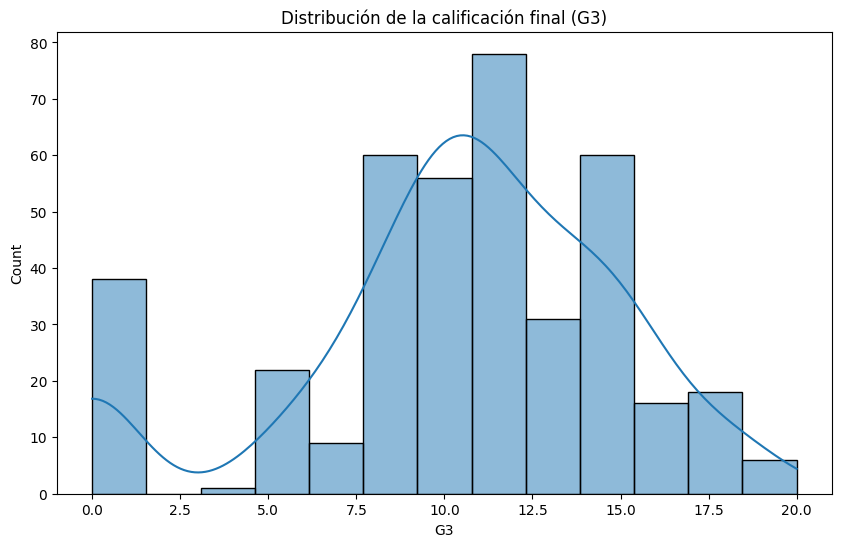

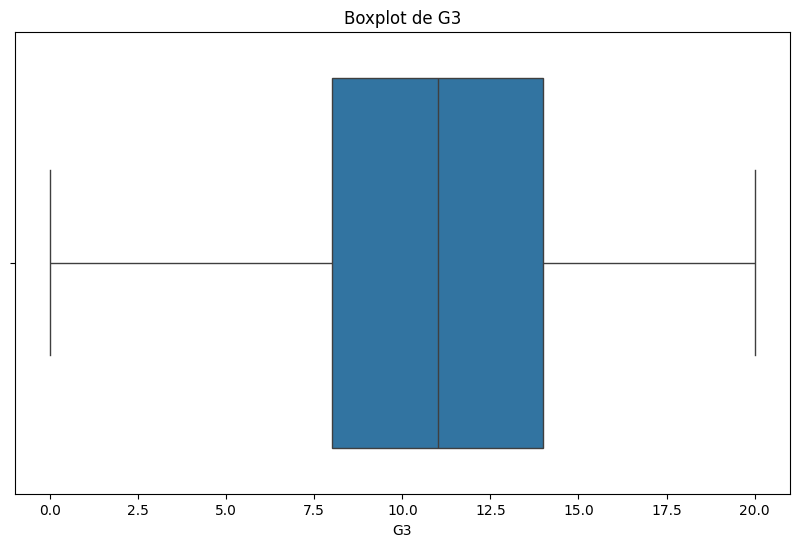

In [20]:
sns.histplot(df['G3'], kde=True)
plt.title('Distribución de la calificación final (G3)')
plt.xlabel('G3')
plt.show()

sns.boxplot(x=df['G3'])
plt.title('Boxplot de G3')
plt.show()

Frecuencia de clases:
rendimiento
medio    192
bajo     130
alto      73
Name: count, dtype: int64


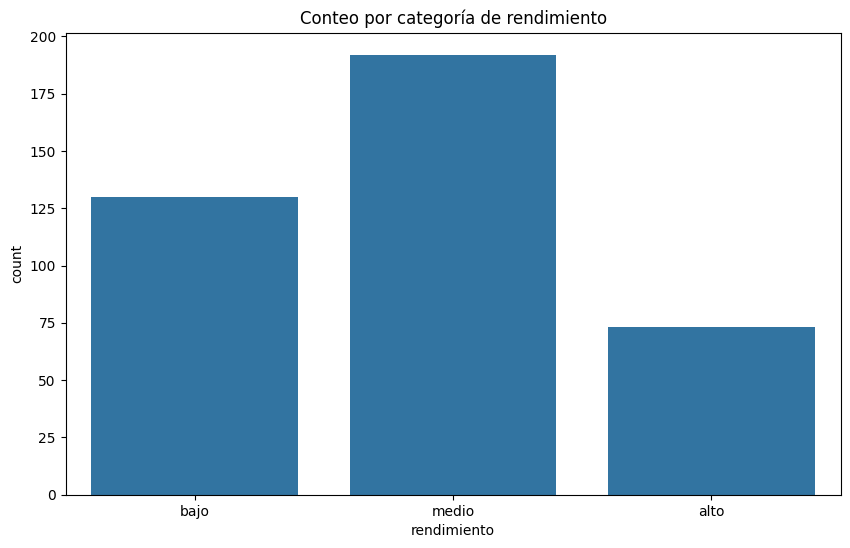

In [21]:
bins = [-1, 9, 14, 20]
etiquetas = ['bajo', 'medio', 'alto']
df['rendimiento'] = pd.cut(df['G3'], bins=bins, labels=etiquetas)


print('Frecuencia de clases:')
print(df['rendimiento'].value_counts())


sns.countplot(x='rendimiento', data=df)
plt.title('Conteo por categoría de rendimiento')
plt.show()

In [22]:
print(df['rendimiento'].value_counts(normalize=True))

print('Rendimiento según sexo:')
print(pd.crosstab(df['sex'], df['rendimiento']))

rendimiento
medio    0.486076
bajo     0.329114
alto     0.184810
Name: proportion, dtype: float64
Rendimiento según sexo:
rendimiento  bajo  medio  alto
sex                           
F              75    101    32
M              55     91    41


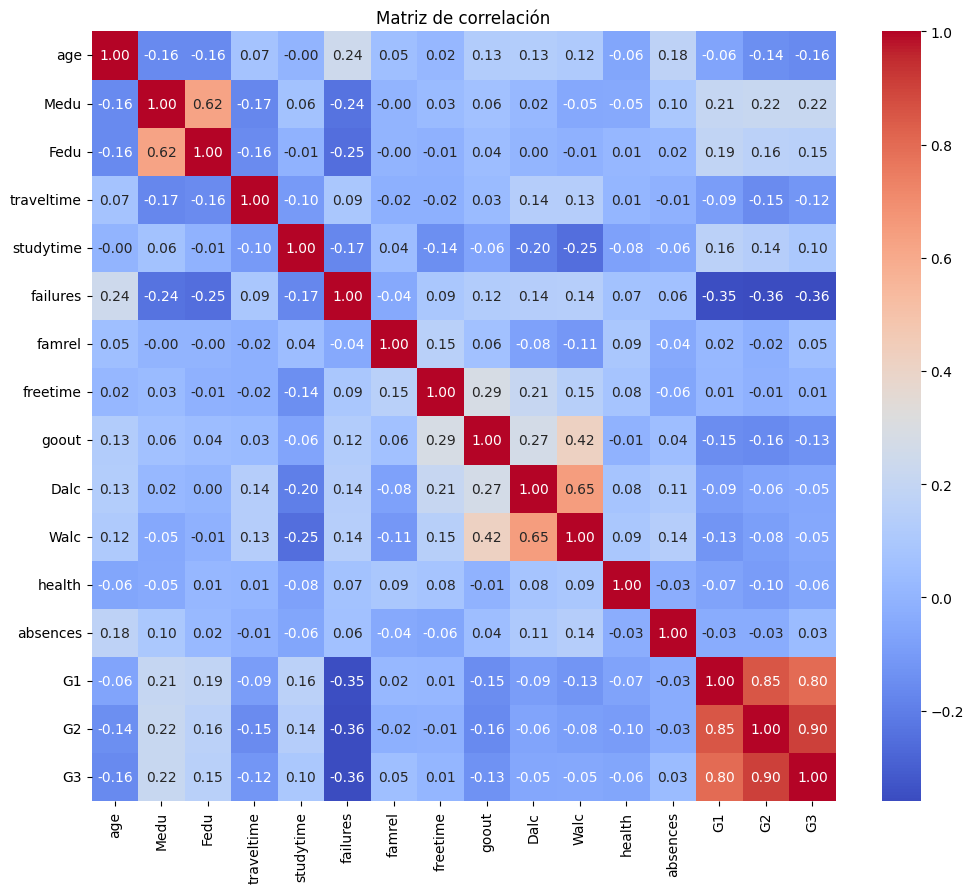

Correlaciones más altas con G3:
G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
Name: G3, dtype: float64


In [23]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()


plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


print('Correlaciones más altas con G3:')
print(corr['G3'].abs().sort_values(ascending=False).head(15))

Columnas categóricas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'rendimiento']
---- school ----
school
GP    349
MS     46
Name: count, dtype: int64


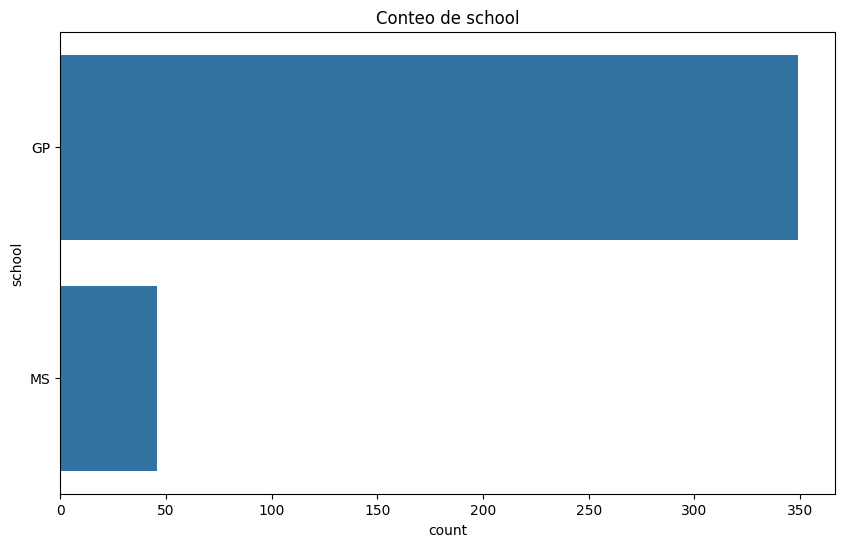

---- sex ----
sex
F    208
M    187
Name: count, dtype: int64


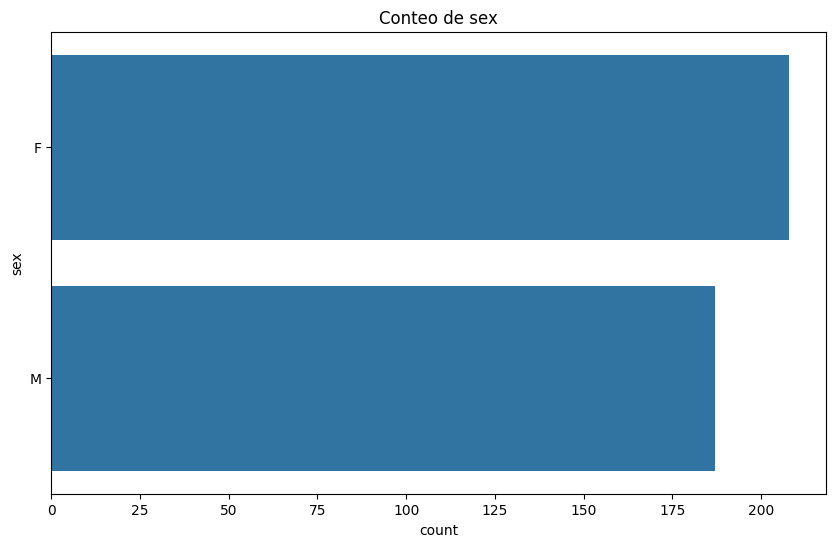

---- address ----
address
U    307
R     88
Name: count, dtype: int64


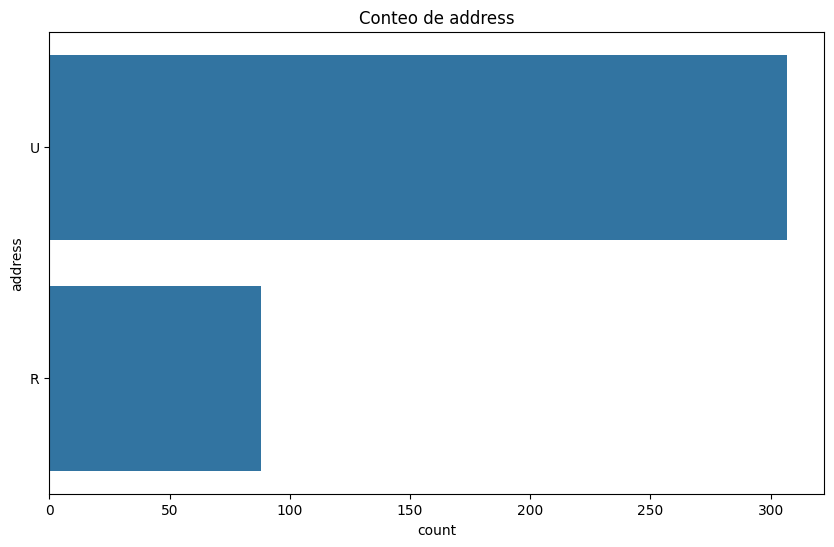

---- famsize ----
famsize
GT3    281
LE3    114
Name: count, dtype: int64


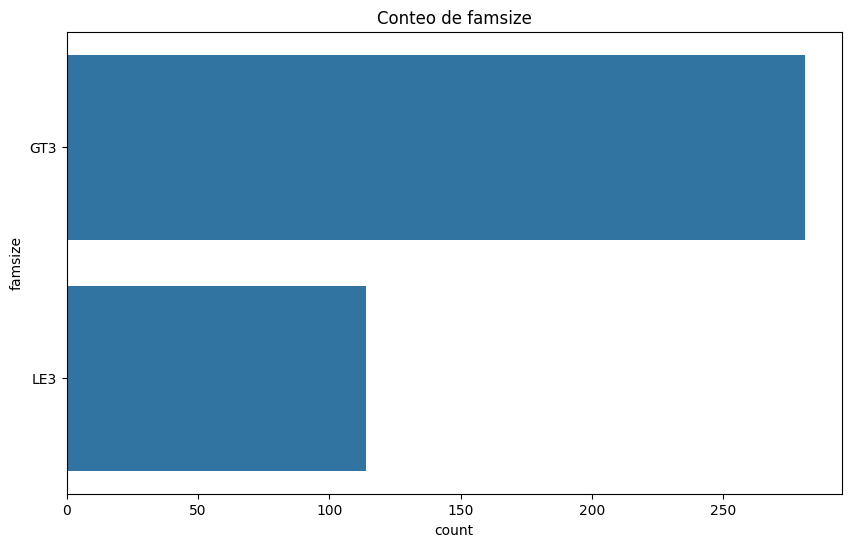

---- Pstatus ----
Pstatus
T    354
A     41
Name: count, dtype: int64


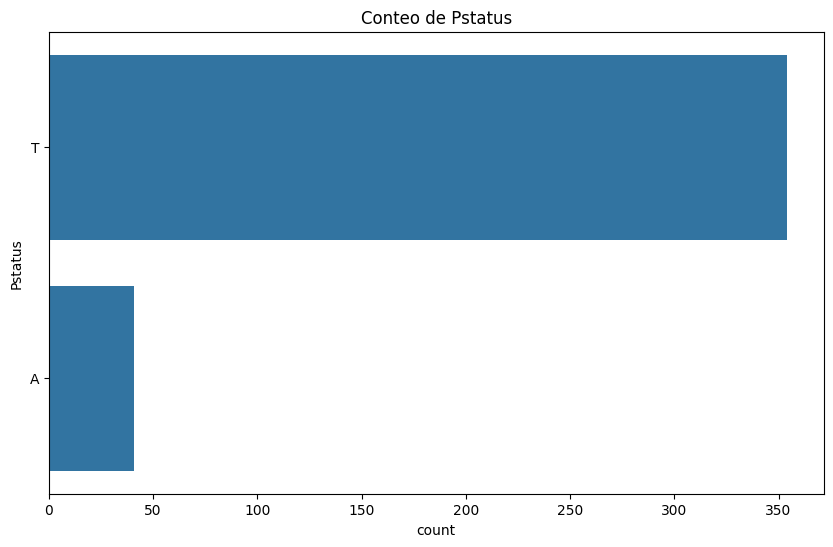

---- Mjob ----
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


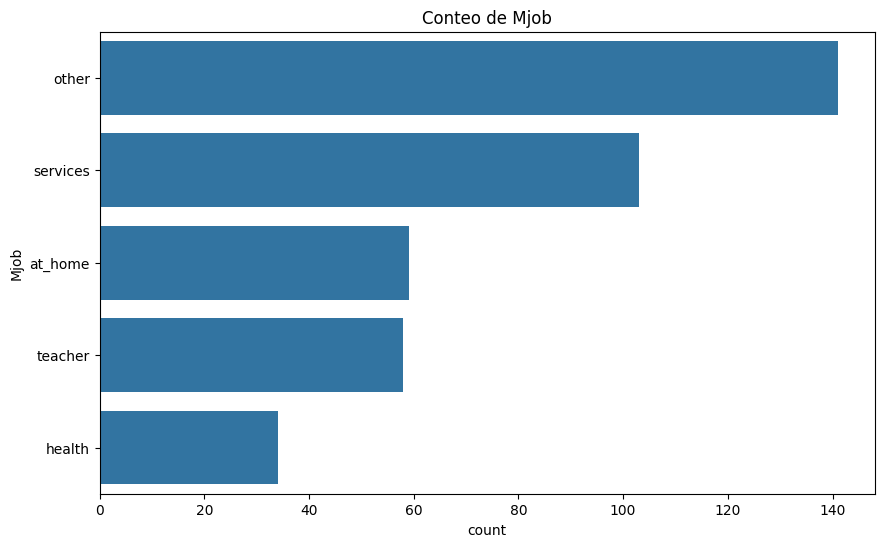

---- Fjob ----
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


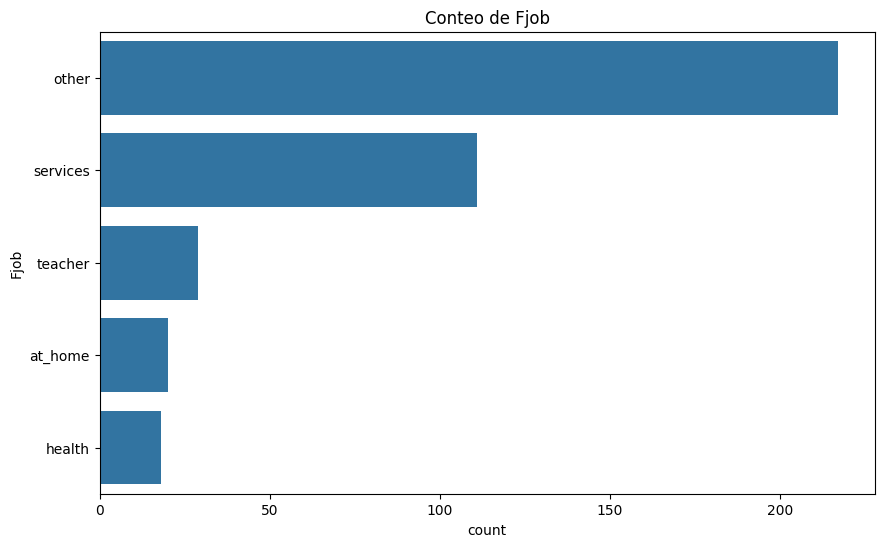

---- reason ----
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64


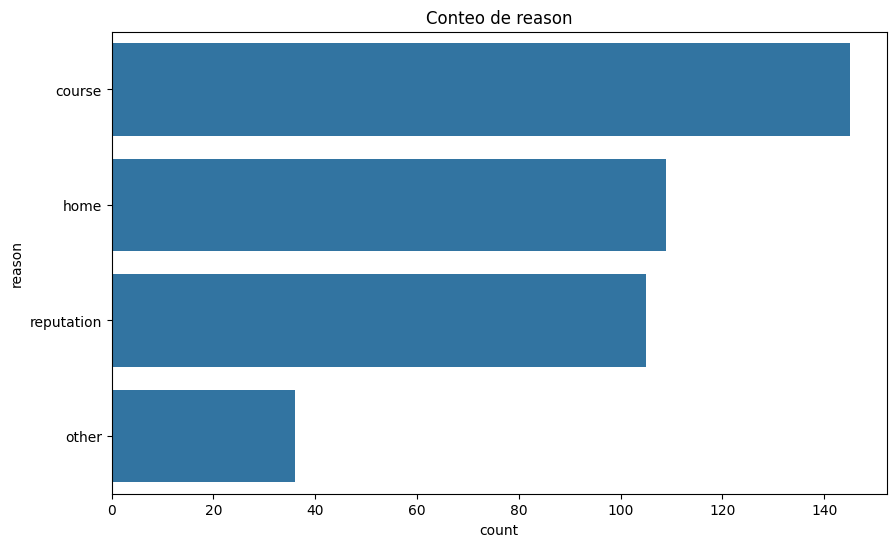

---- guardian ----
guardian
mother    273
father     90
other      32
Name: count, dtype: int64


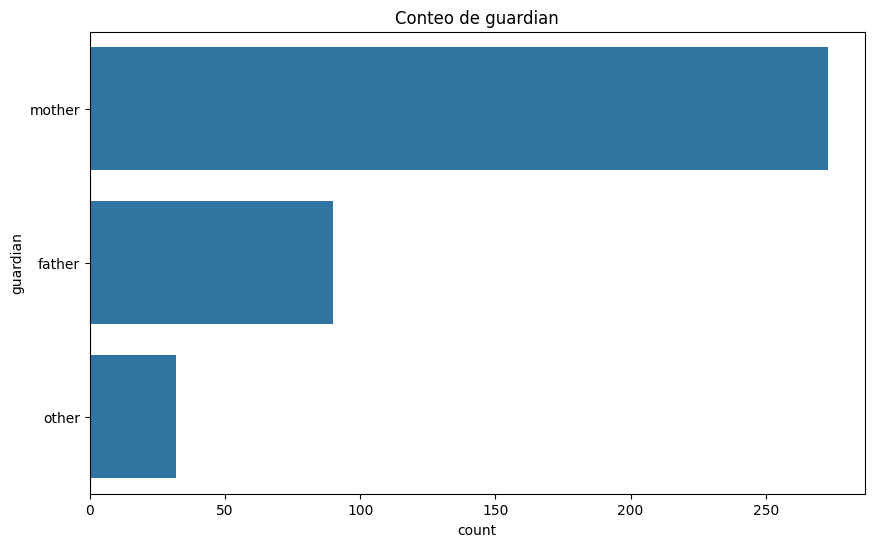

---- schoolsup ----
schoolsup
no     344
yes     51
Name: count, dtype: int64


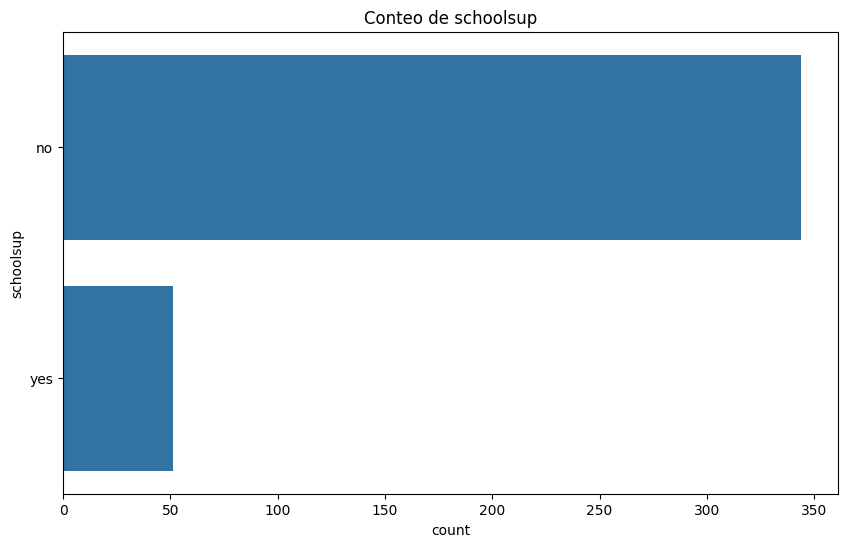

---- famsup ----
famsup
yes    242
no     153
Name: count, dtype: int64


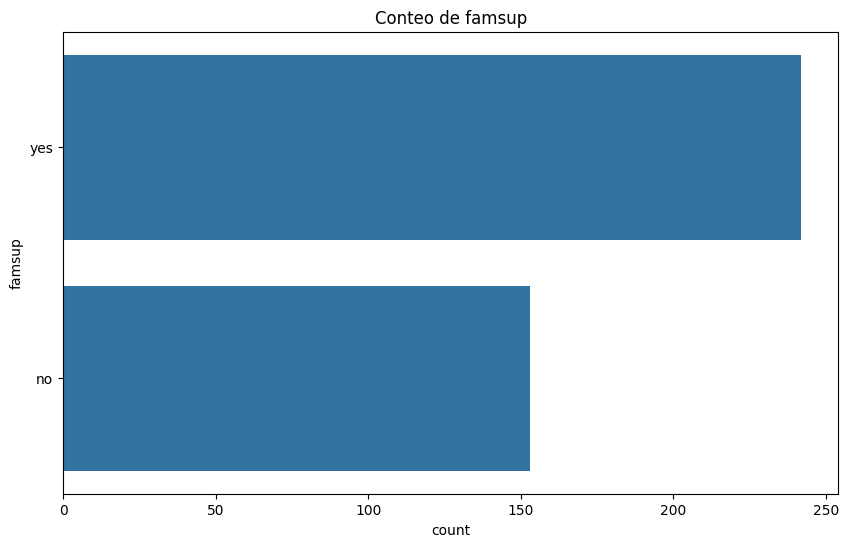

---- paid ----
paid
no     214
yes    181
Name: count, dtype: int64


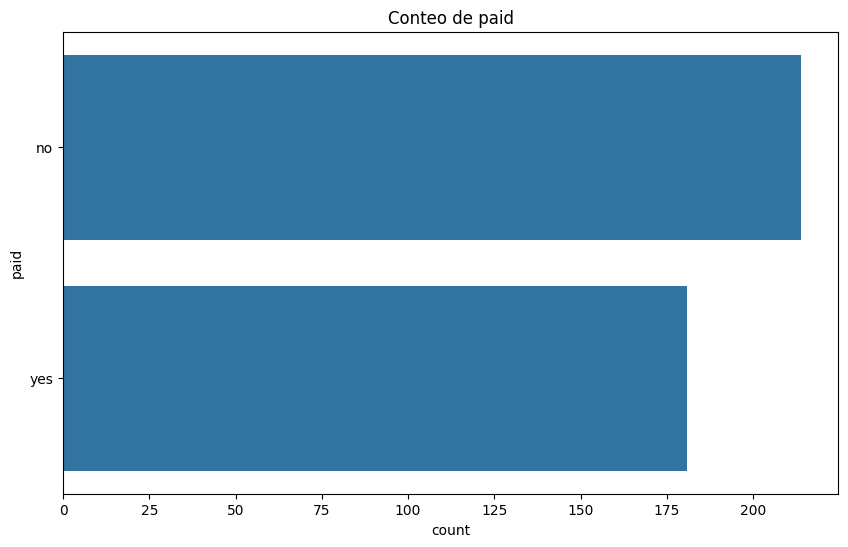

---- activities ----
activities
yes    201
no     194
Name: count, dtype: int64


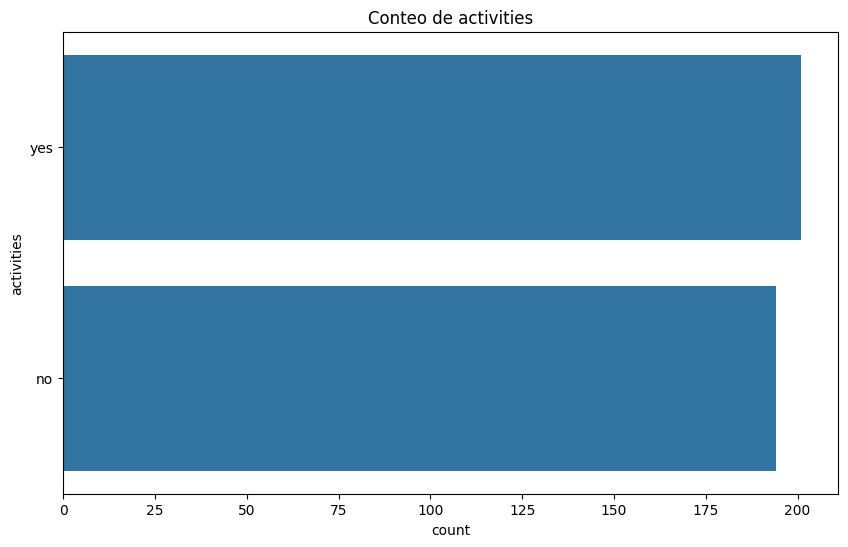

---- nursery ----
nursery
yes    314
no      81
Name: count, dtype: int64


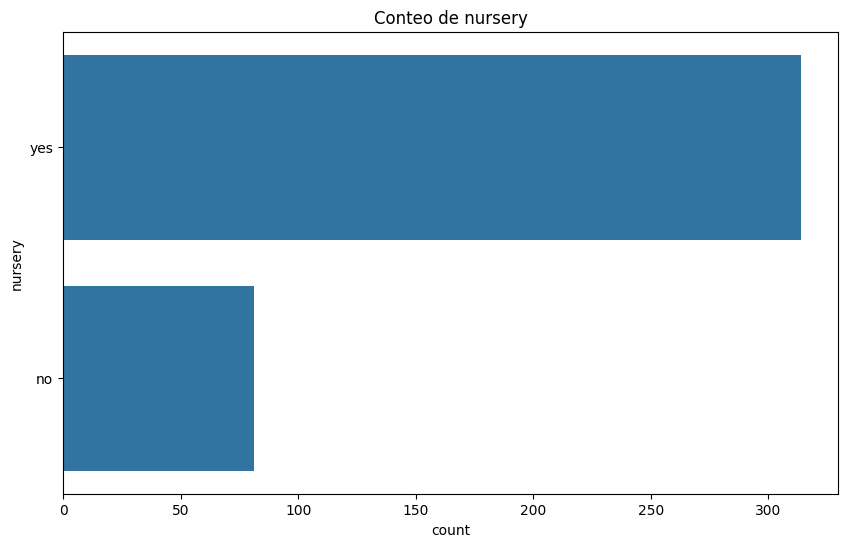

---- higher ----
higher
yes    375
no      20
Name: count, dtype: int64


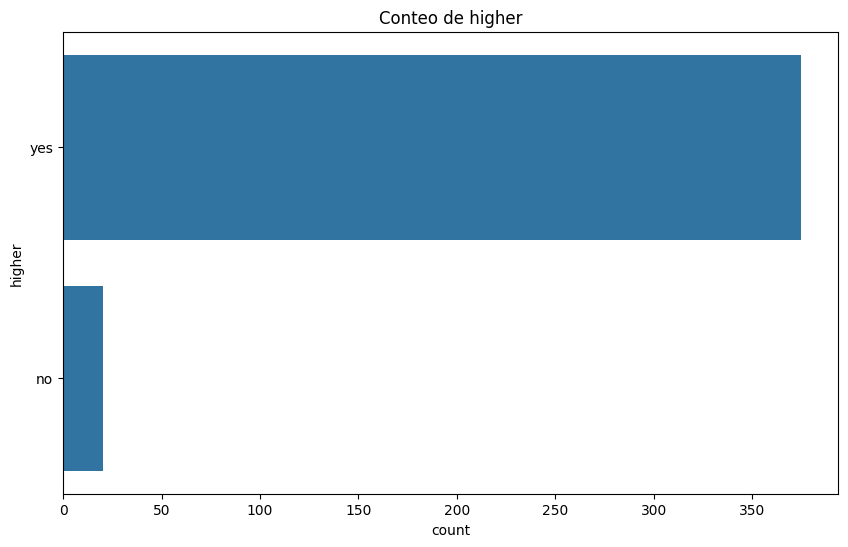

---- internet ----
internet
yes    329
no      66
Name: count, dtype: int64


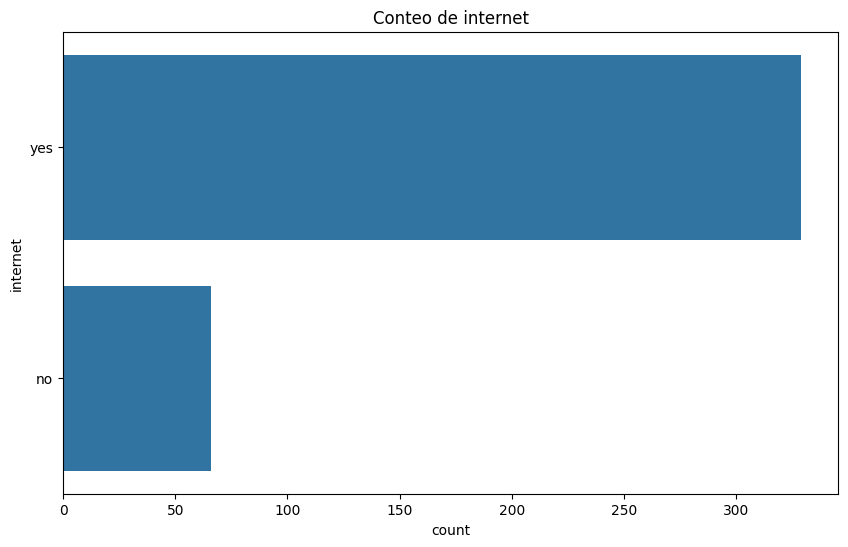

---- romantic ----
romantic
no     263
yes    132
Name: count, dtype: int64


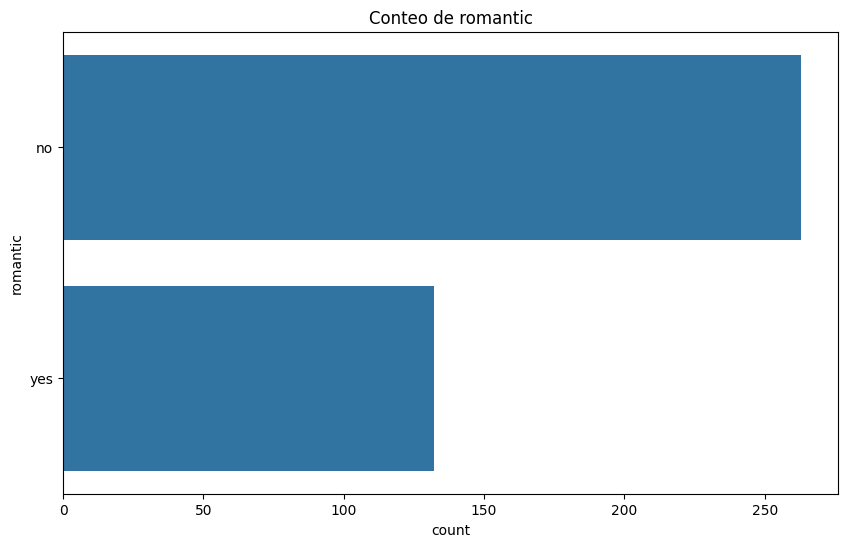

---- rendimiento ----
rendimiento
medio    192
bajo     130
alto      73
Name: count, dtype: int64


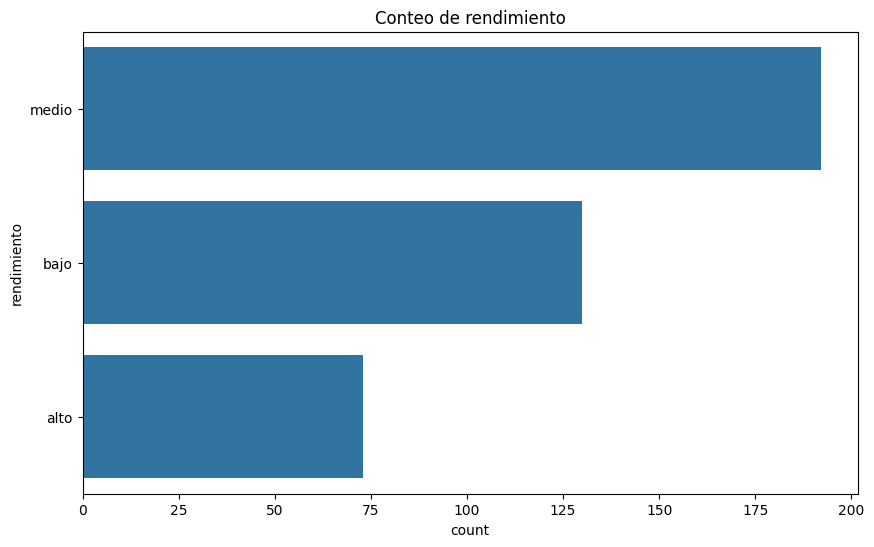

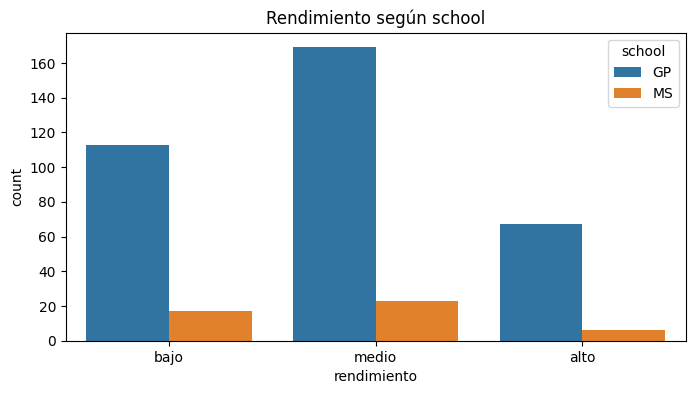

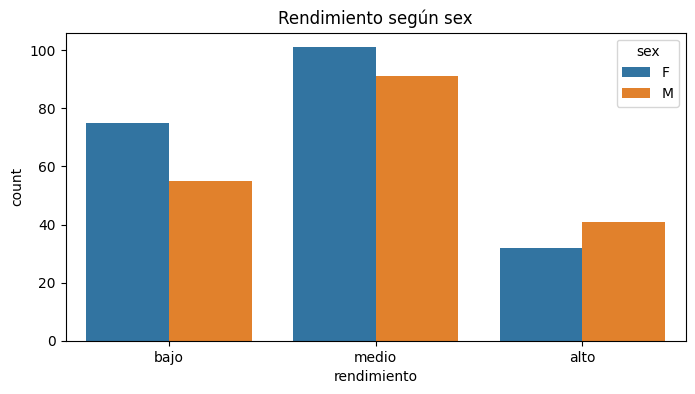

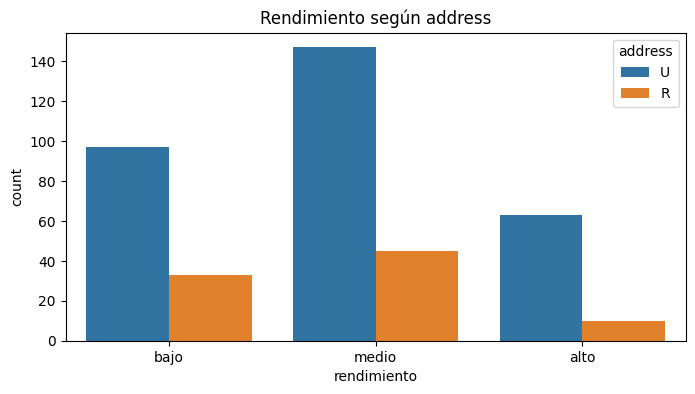

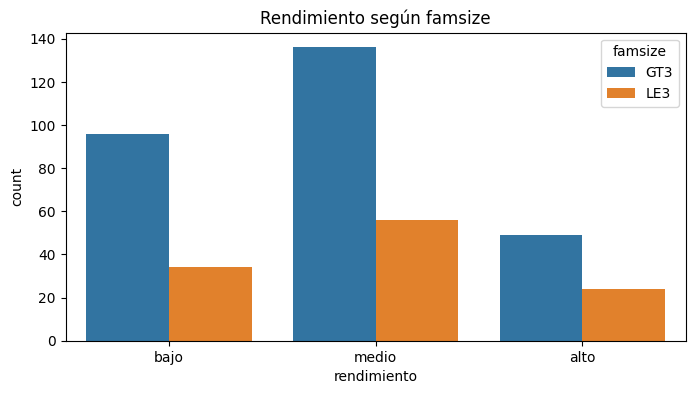

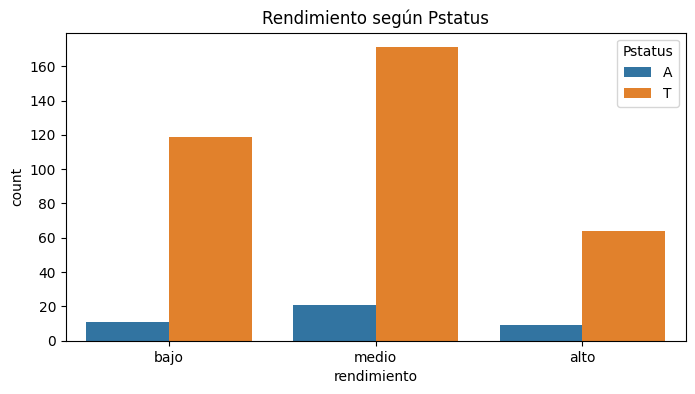

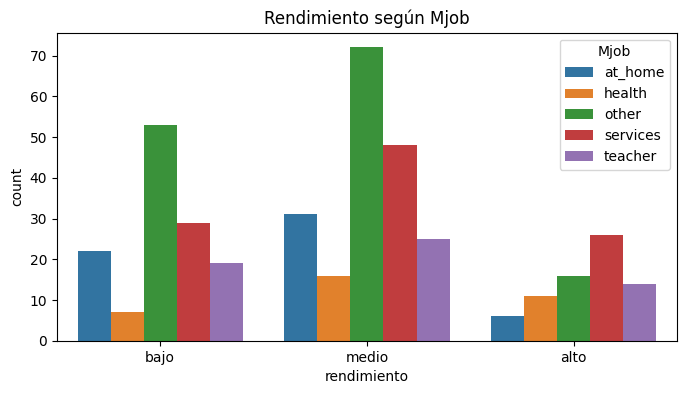

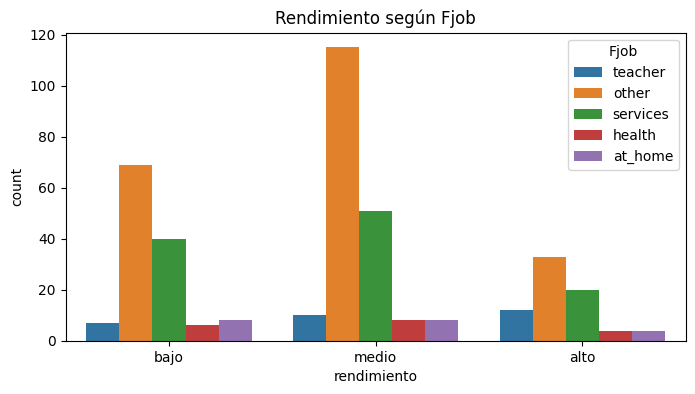

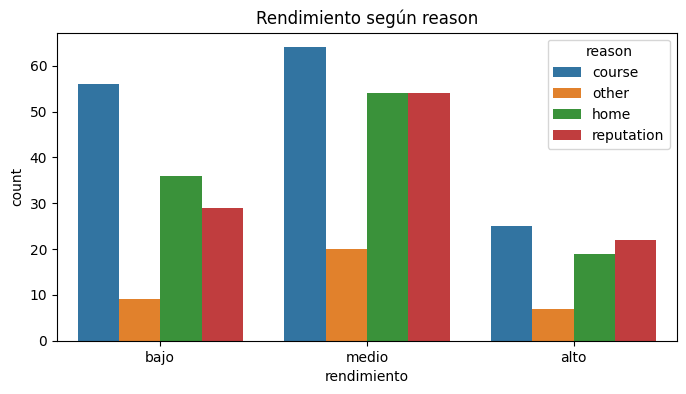

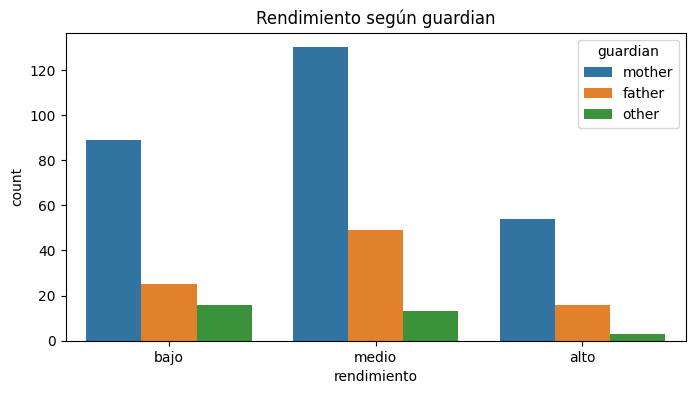

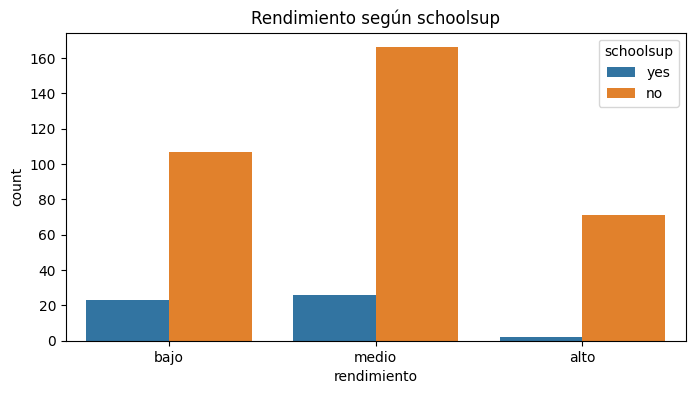

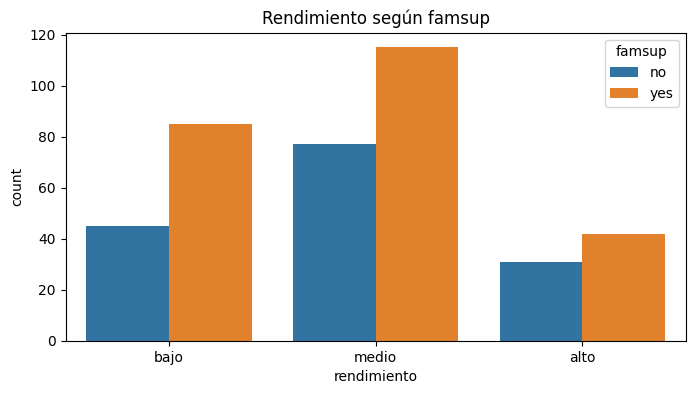

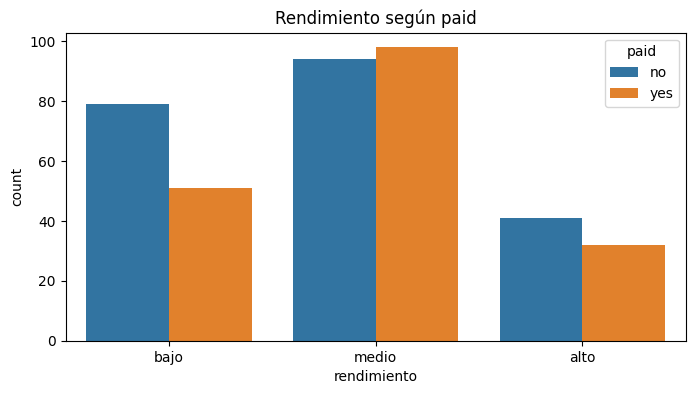

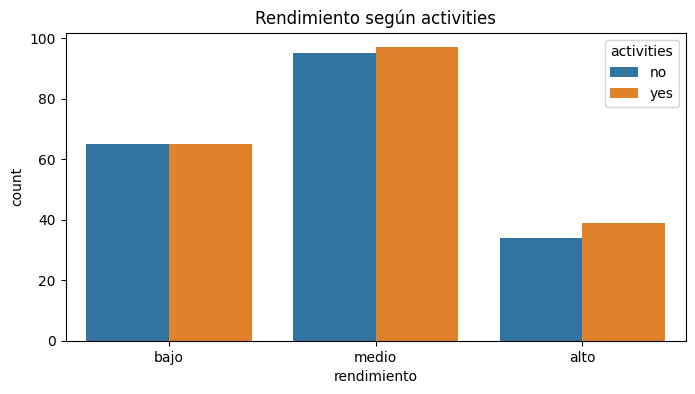

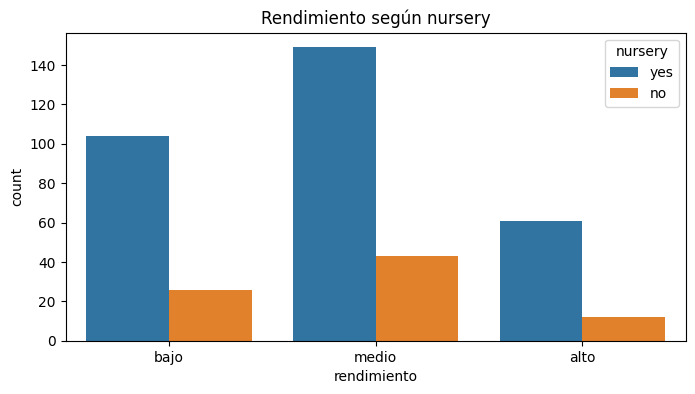

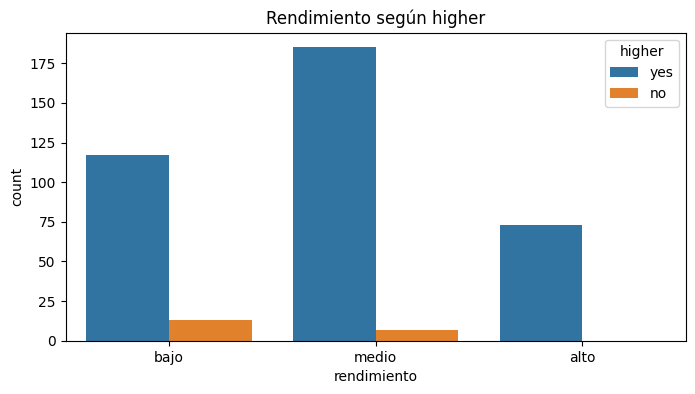

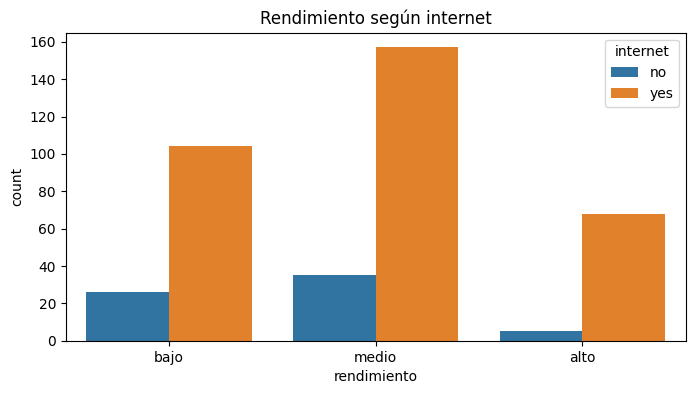

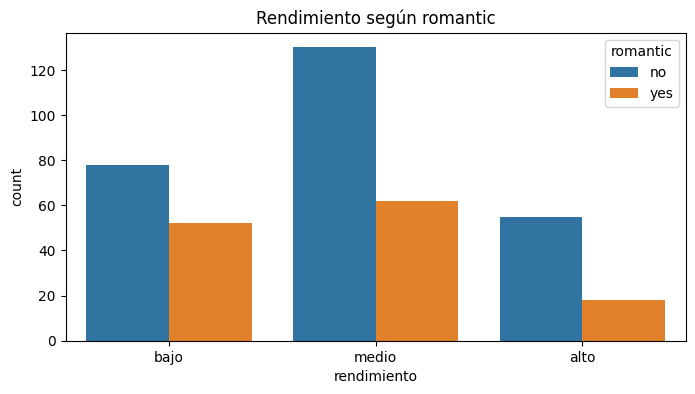

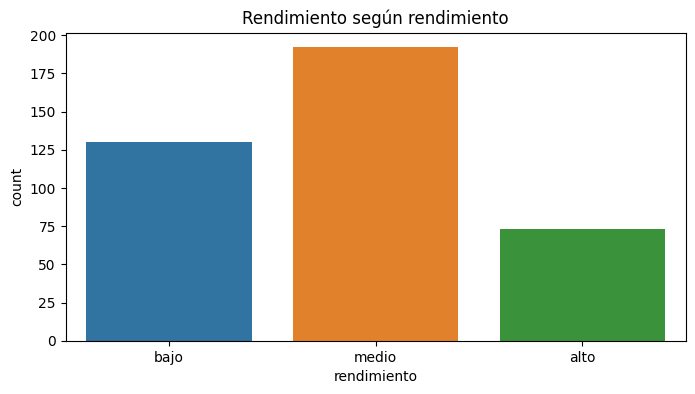

In [25]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Columnas categóricas:', cat_cols)


for col in cat_cols:
  print('----', col, '----')
  print(df[col].value_counts())
  sns.countplot(y=col, data=df, order=df[col].value_counts().index)
  plt.title(f'Conteo de {col}')
  plt.show()


for col in cat_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(x='rendimiento', hue=col, data=df)
  plt.title(f'Rendimiento según {col}')
  plt.show()

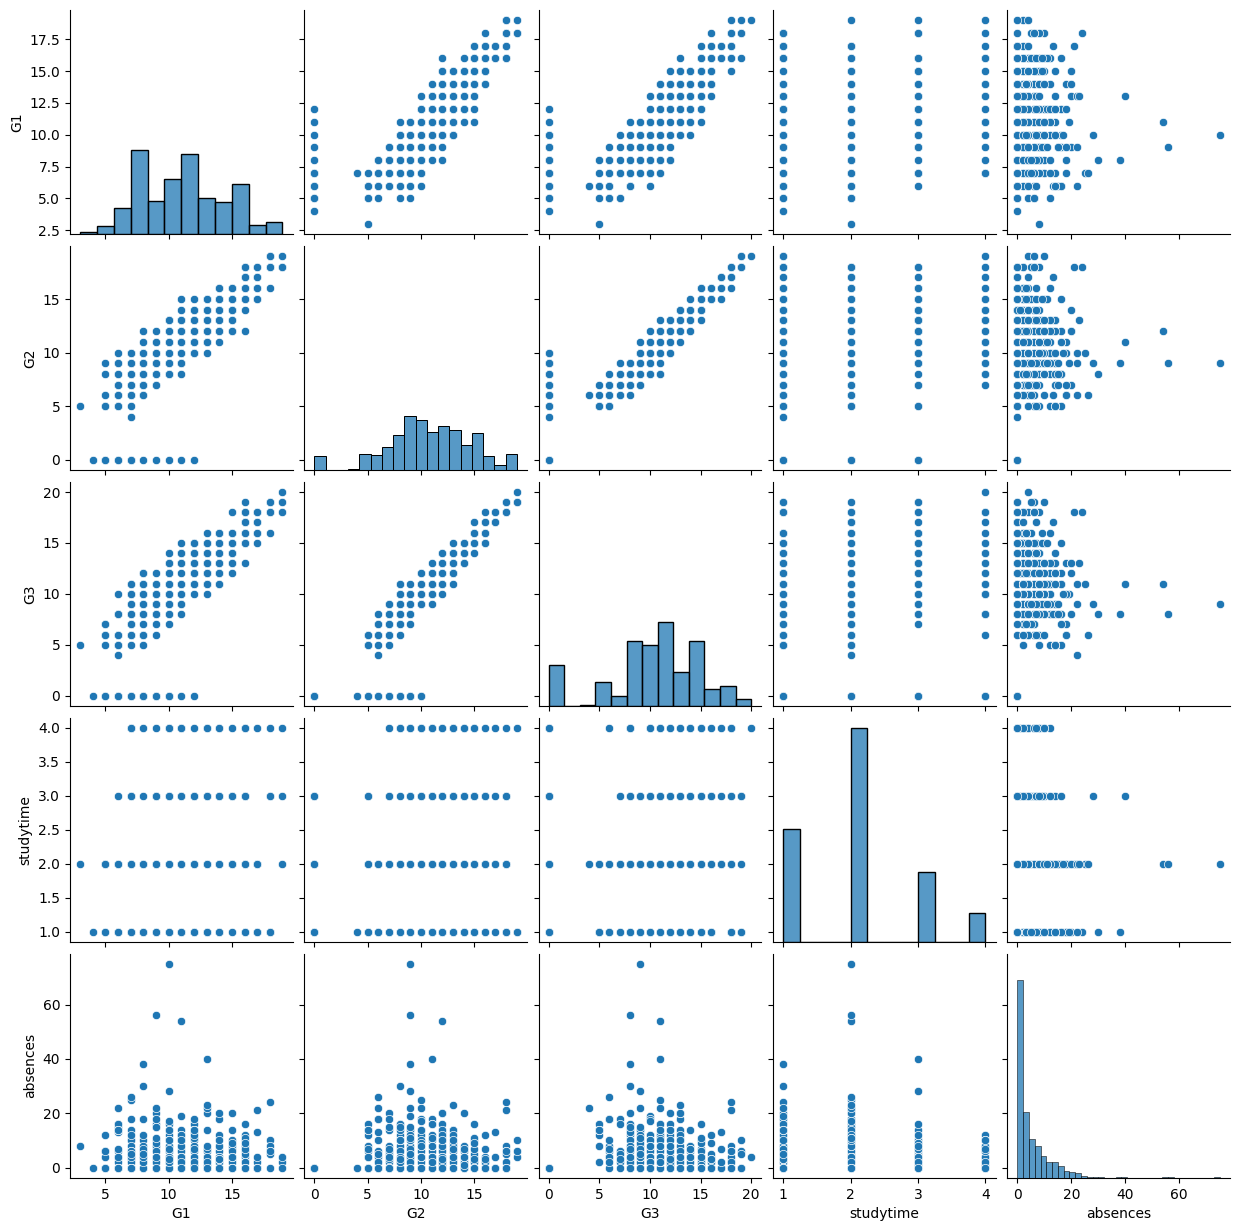

In [26]:
seleccion = ['G1','G2','G3','studytime','absences']
sns.pairplot(df[seleccion].dropna())
plt.show()

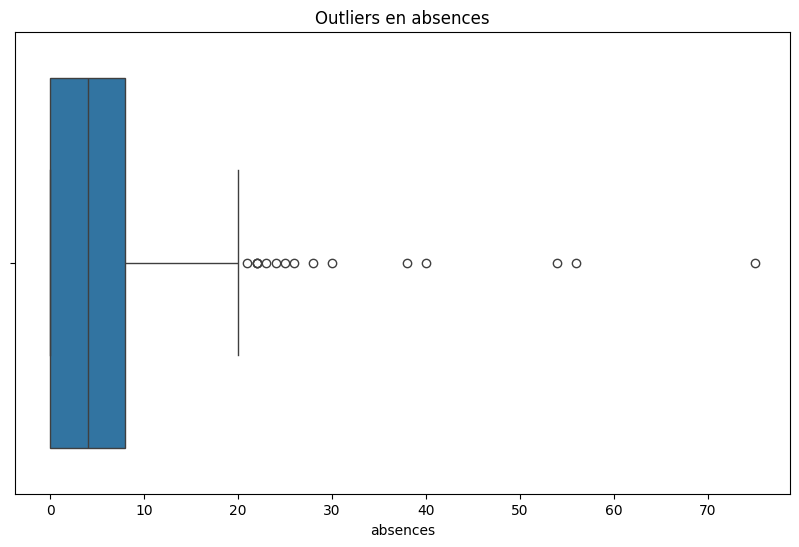

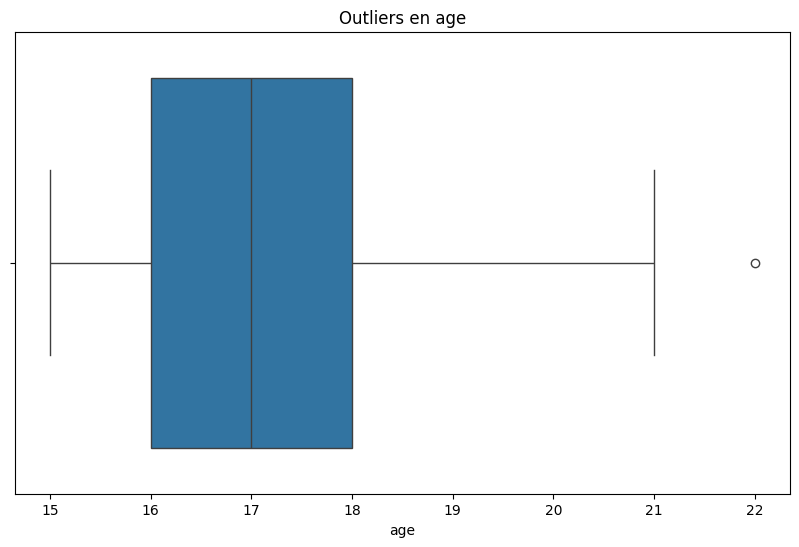

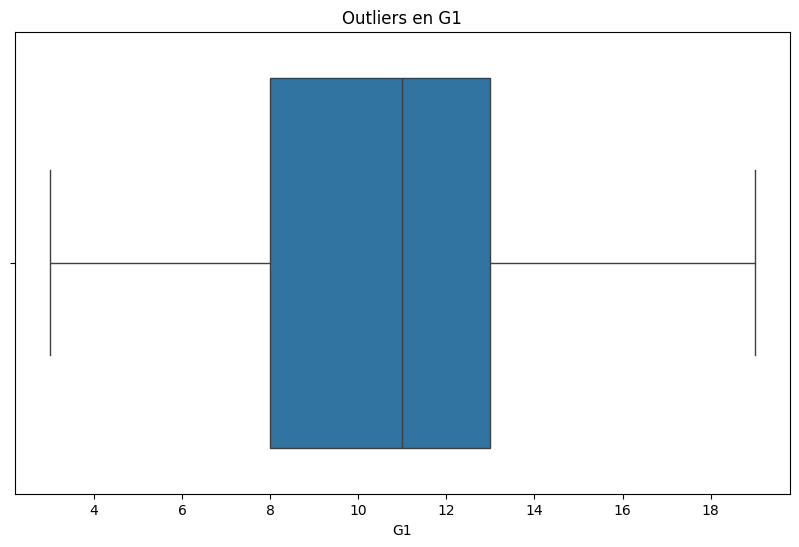

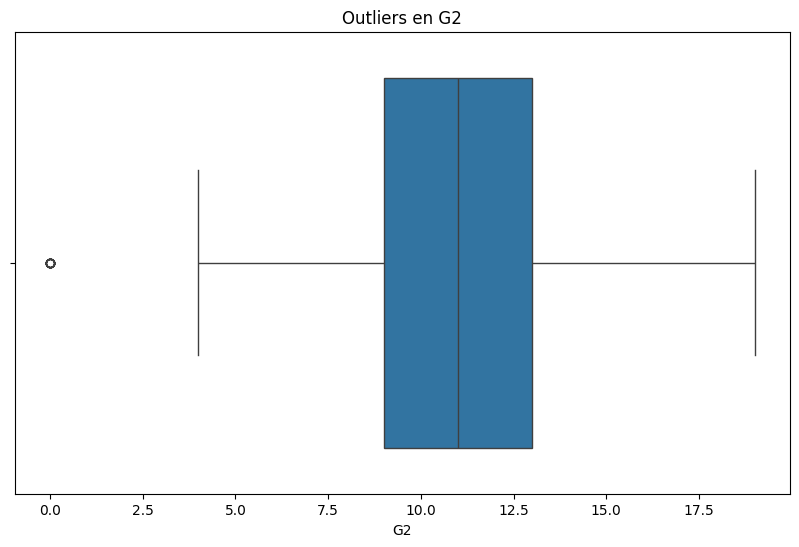

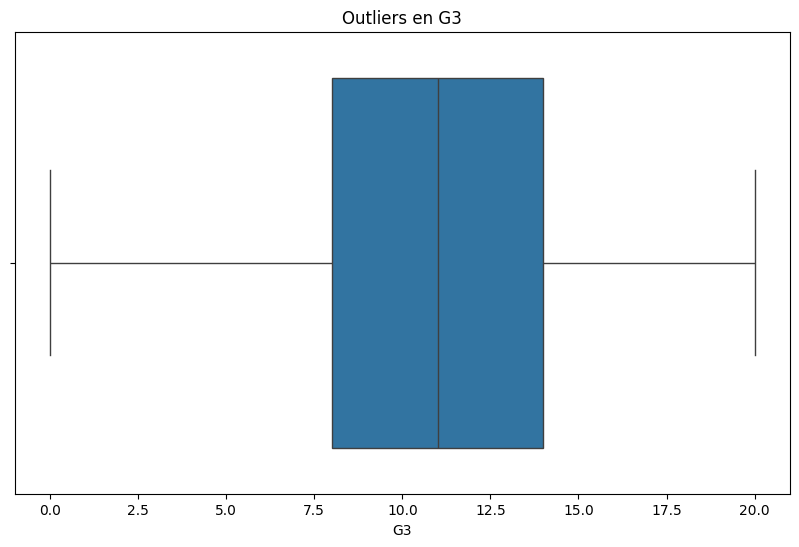

Filas con muchas ausencias:
     absences  G3 rendimiento
40         25  11       medio
74         54  11       medio
103        26   6        bajo
118        20   8        bajo
183        56   8        bajo


In [27]:
for col in ['absences','age','G1','G2','G3']:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Outliers en {col}')
  plt.show()

print('Filas con muchas ausencias:')
print(df[df['absences'] > df['absences'].quantile(0.95)][['absences','G3','rendimiento']].head())

In [28]:
mapa_binario = {'yes':1, 'no':0}


if 'schoolsup' in df.columns:
  df['schoolsup_bin'] = df['schoolsup'].map(mapa_binario)


cols_soporte = ['schoolsup','famsup','paid']
cols_soporte = [c for c in cols_soporte if c in df.columns]


if cols_soporte:
  df['conteo_soporte'] = df[cols_soporte].apply(lambda fila: sum([1 if x=='yes' else 0 for x in fila]), axis=1)
  print('Conteo de soportes:')
  print(df['conteo_soporte'].value_counts())

Conteo de soportes:
conteo_soporte
2    142
1    133
0    101
3     19
Name: count, dtype: int64


##Preprocesamiento

In [29]:
modelo_df = df.copy()
modelo_df = pd.get_dummies(modelo_df, drop_first=True)


print('Dimensiones después de codificar:', modelo_df.shape)

Dimensiones después de codificar: (395, 46)


In [30]:
escalador = StandardScaler()
num_features = [c for c in num_cols if c != 'G3']
modelo_df[num_features] = escalador.fit_transform(modelo_df[num_features])


print('Escalado completado.')

Escalado completado.


In [34]:
modelo_df.to_csv('dataset_limpio.csv', index=False)
print('Archivo guardado: dataset_limpio.csv')

Archivo guardado: dataset_limpio.csv


In [35]:
def clasificar_rendimiento(g3):
    if g3 <= 9:
        return "bajo"
    elif 10 <= g3 <= 14:
        return "medio"
    else:
        return "alto"

df["rendimiento"] = df["G3"].apply(clasificar_rendimiento)

In [36]:
X = df.drop(["G3", "rendimiento"], axis=1)
y = df["rendimiento"]

#variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Modelos

###Regresión logistica multiclase

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=200, multi_class="ovr")
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("=== REGRESIÓN LOGÍSTICA ===")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

=== REGRESIÓN LOGÍSTICA ===
              precision    recall  f1-score   support

        alto       0.80      0.80      0.80        15
        bajo       0.79      0.85      0.81        26
       medio       0.81      0.76      0.78        38

    accuracy                           0.80        79
   macro avg       0.80      0.80      0.80        79
weighted avg       0.80      0.80      0.80        79

[[12  0  3]
 [ 0 22  4]
 [ 3  6 29]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


###KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

=== KNN ===
              precision    recall  f1-score   support

        alto       0.67      0.53      0.59        15
        bajo       0.58      0.58      0.58        26
       medio       0.63      0.68      0.66        38

    accuracy                           0.62        79
   macro avg       0.63      0.60      0.61        79
weighted avg       0.62      0.62      0.62        79

[[ 8  2  5]
 [ 1 15 10]
 [ 3  9 26]]


###SVM

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

=== SVM ===
              precision    recall  f1-score   support

        alto       0.82      0.60      0.69        15
        bajo       0.82      0.54      0.65        26
       medio       0.65      0.87      0.74        38

    accuracy                           0.71        79
   macro avg       0.76      0.67      0.70        79
weighted avg       0.74      0.71      0.70        79

[[ 9  0  6]
 [ 0 14 12]
 [ 2  3 33]]


##Metricas

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


modelos = {
"Regresión Logística": log_reg,
"KNN": knn,
"SVM": svm
}


for nombre, modelo in modelos.items():
    pred = modelo.predict(X_test_scaled)
    print(f"\n==== {nombre} ====")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f"Precision: {precision_score(y_test, pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, pred, average='weighted'):.4f}")


==== Regresión Logística ====
Accuracy: 0.7975
Precision: 0.7980
Recall: 0.7975
F1-score: 0.7971

==== KNN ====
Accuracy: 0.6203
Precision: 0.6215
Recall: 0.6203
F1-score: 0.6190

==== SVM ====
Accuracy: 0.7089
Precision: 0.7376
Recall: 0.7089
F1-score: 0.7025


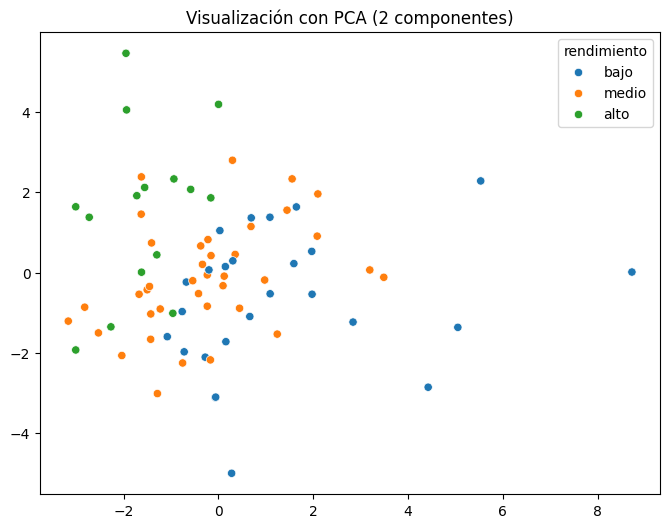

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test)
plt.title("Visualización con PCA (2 componentes)")
plt.show()

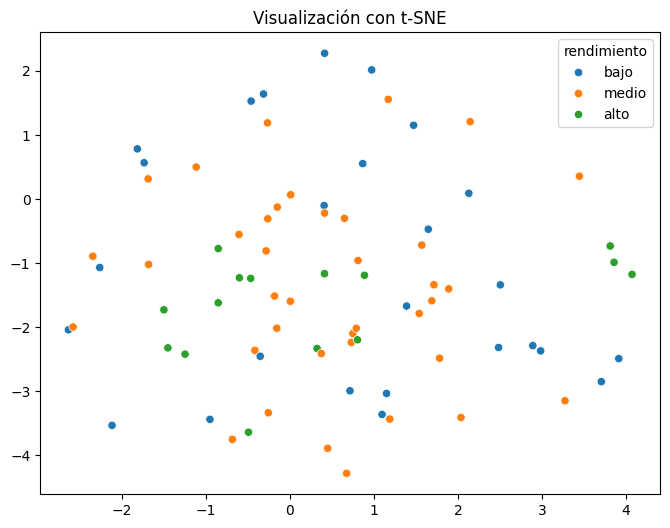

In [47]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X_test_scaled)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_test)
plt.title("Visualización con t-SNE")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


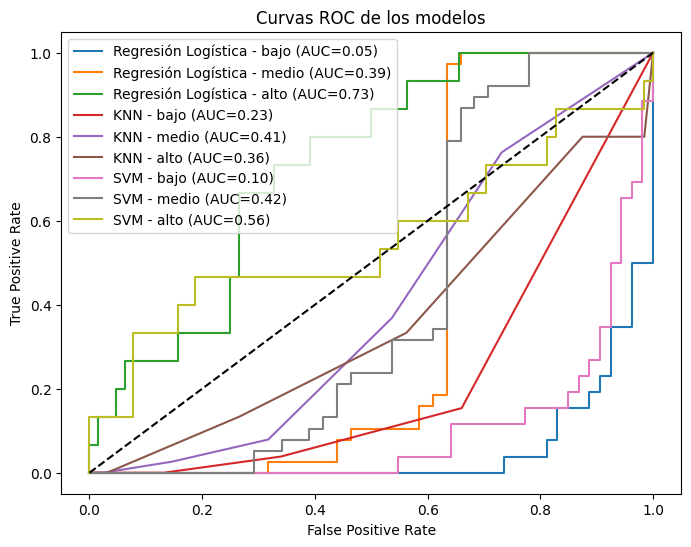

In [52]:
# CURVA ROC MULTICLASE
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


# Binarizar las etiquetas de salida
y_bin = label_binarize(y_test, classes=["bajo", "medio", "alto"])


plt.figure(figsize=(8,6))
for nombre, modelo in modelos.items():
    clf_ovr = OneVsRestClassifier(modelo)
    clf_ovr.fit(X_train_scaled, y_train)
    y_score = clf_ovr.decision_function(X_test_scaled) if hasattr(clf_ovr, 'decision_function') else clf_ovr.predict_proba(X_test_scaled)


    for i, clase in enumerate(["bajo", "medio", "alto"]):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{nombre} - {clase} (AUC={roc_auc:.2f})")


plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de los modelos")
plt.legend()
plt.show()

##Interpretación de resultados

Los resultados muestran que la Regresión Logística es el modelo con mejor desempeño (≈80%), lo que indica que gran parte de la relación entre las características del estudiante y su nivel de rendimiento puede explicarse mediante patrones lineales y relativamente estables. Esto es técnicamente relevante para el caso de estudio, porque implica que no se requiere un modelo complejo para obtener predicciones sólidas; más bien, lo crítico es la calidad del preprocesamiento, la correcta codificación de variables y la selección de atributos que realmente aporten información. El rendimiento inferior de SVM y especialmente de KNN señala que los modelos sensibles a la escala, ruido o distribución desigual de clases pueden verse afectados negativamente por la estructura del dataset, lo que refuerza que el problema requiere robustez estadística antes que complejidad algorítmica. Desde esta perspectiva técnica, el estudio evidencia que el rendimiento académico en este conjunto de datos se puede modelar de forma eficiente con métodos interpretables, lo cual facilita explicar las predicciones y evaluar la contribución individual de cada variable.

En cuanto a las implicaciones éticas, aunque el modelo logra predecir patrones de desempeño, las características utilizadas incluyen elementos académicos y conductuales que pueden reflejar desigualdades preexistentes —como hábitos de estudio, asistencia o rendimiento previo—, lo que podría amplificar sesgos si se usa sin cuidado. Por ello, estas predicciones deben emplearse exclusivamente para identificar necesidades de apoyo, no para clasificar o restringir oportunidades educativas. Además, es necesario garantizar la privacidad de los estudiantes y comunicar de forma transparente cómo se utilizan los datos y con qué propósito, manteniendo siempre la premisa de que un modelo es una herramienta de orientación y no un veredicto sobre las capacidades de una persona.